<a href="https://colab.research.google.com/github/alperenb/alpduino.com/blob/master/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
img1 = cv2.imread('dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
img1 = cv2.resize(img1,(1200,1200))
img2= cv2.resize(img2,(1200,1200))

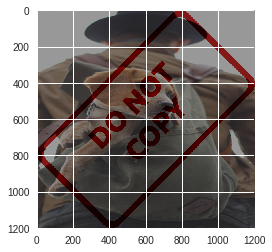

In [8]:
blended = cv2.addWeighted(src1 = img1, alpha=0.5, src2=img2, beta= 0.5, gamma=-100)
#alpha img1 in parlaklık değeri beta ise img2 nin parlaklık değeridir.
plt.imshow(blended)

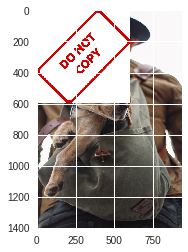

In [32]:
#daha büyük bir resmin üzerine küçük resmi bindir(kaplama)
#Numpy reassigment
img1 = cv2.imread('dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

img2= cv2.resize(img2,(600,600))

large_img = img1 
small_img=img2

x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]
y_end = x_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

In [0]:
# blend together images of different sizes
img1 = cv2.imread('dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2= cv2.resize(img2,(600,600))

x_offset = 934 - 600
y_offset =1401 - 600

rows,cols,channels = img2.shape
#region of interest
roi = img1[y_offset:1401, x_offset:934]


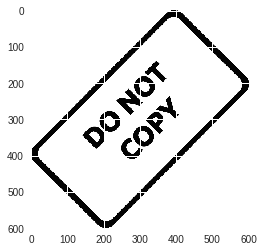

In [36]:
###Creating mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
img2gray= cv2.resize(img2gray,(600,600))
plt.imshow(img2gray,cmap='gray')

(600, 600)

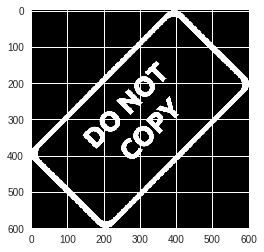

In [37]:
#calculates per-element bit-wise inversion of the input
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')
mask_inv.shape #no longer color channels

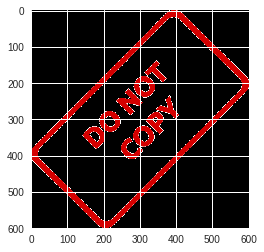

In [38]:
import numpy as np
white_background = np.full(img2.shape,255,dtype=np.uint8)

#calculates the per-element bitwise disjunction of two arrays or an array and a scalar
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

fg= cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

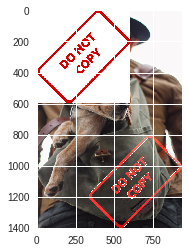

In [54]:
final_roi=cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)


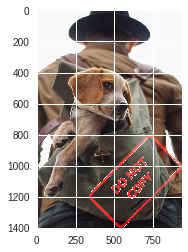

In [55]:

img1 = cv2.imread('dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
large_img = img1
small_img=final_roi
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)



# **`Image Thresholding`**

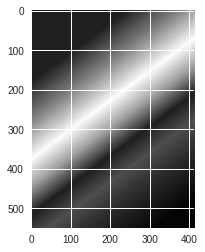

In [59]:
img =cv2.imread('rainbow.jpg',0) # '0' for convert grayscale 
plt.imshow(img,cmap='gray')

In [0]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)#(resim,eşik değeri,maximum değer, threshold türü)
#ret : eşik değeri
#thresh1 : resim 

#ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 
#eğer pixel değeri threshold değerinden büyük ise pixel değeri max değeri alır.Değil ise 0 değerini alır.

#ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) 
#eğer pixel değeri threshold değerinden büyük ise pixel değeri 0 değerini alır.Değil ise max değeri alır.

#ret,thresh1 = cv2.threshold(img,127,255,cv2.TRUNC) 
#eğer pixel değeri threshold değerinden büyük ise pixel değeri threshold değerini alır.Değil ise  değerini korur.

#ret,thresh1 = cv2.threshold(img,127,255,cv2.TOZERO) 
#eğer pixel değeri threshold değerinden büyük ise pixel değerini korur.Değil ise  0 değerini alır. 

#ret,thresh1 = cv2.threshold(img,127,255,cv2.TOZERO_INV) 
#eğer pixel değeri threshold değerinden büyük ise  0 değerini alır.DEğil ise pixel değerini korur.

In [0]:
img = cv2.imread('crossword.jpg',0)

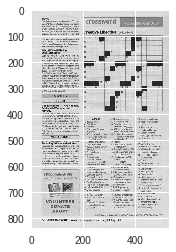

In [65]:
plt.imshow(img,cmap='gray')

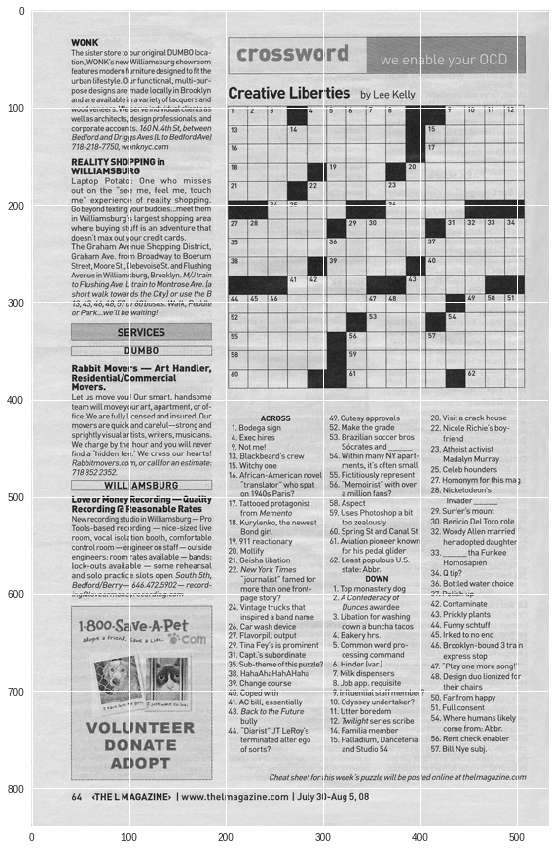

In [67]:
def show_pic(img): # resim boyutunu büyük göstermek için yazılmış fonks. daha sonra incele..
  fig = plt.figure(figsize=(15,15))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  
show_pic(img)

**Adaptive Threshold**

In [0]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8)
#ilk constant değer genellikle 3 5 7 ve 11 gibi değerler alır.blockSize - Piksel için bir eşik değeri hesaplamak için kullanılan bir piksel mahallesinin boyutu: 3, 5, 7 vb.
#ikinci constant değeri : C - Sabit ortalama veya ağırlıklı ortalamadan çıkarıldı (aşağıdaki ayrıntılara bakın). Normalde, pozitifdir, ancak sıfır veya negatif olabilir.